# MCMAC results analysis

・'age' is absolute time

・'sep.kpc' is projected distance between two clusters

・'merger' shows the clusters is pre-merger or not

・'TSC_Catalog' shows Time Since Collision from Galaxy Cluster Merger Catalog. 

 We can calculate 
 
 TTC by "(1st apocentric passage's absolute time) - (TSC at 1st apocentric passage) - (dataframe's age) "
 
and 

TSC "(dataframe's age) - { (1st apocentric passage's absolute time) - (TSC at 1st apocentric passage)}".
 
 For simple dataframe, we replaced TTC to TSC by putting minus symbol
 
・'TSC0' shows Time Since Collision from MCMAC-pre-merger and MCMAC-post-merger

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

## Mass ratio 1:1 b=0kpc

In [7]:
filename = '../output_20degree/zh_1to1_b0_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected)

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.00,3098.633732,pre,-1.320000e+00,-1.757204,-1.380083,-2.397628
1,0.40,2495.030909,pre,-9.200000e-01,-1.335174,-1.047167,-1.828944
2,0.60,2116.826388,pre,-7.200000e-01,-1.107855,-0.840231,-1.511650
3,0.80,1664.837693,pre,-5.200000e-01,-0.857156,-0.636056,-1.208409
4,1.00,1180.589026,pre,-3.200000e-01,-0.620071,-0.435405,-0.927292
5,1.20,525.597223,pre,-1.200000e-01,-0.302913,-0.188088,-0.563604
6,1.22,459.726888,pre,-1.000000e-01,-0.266982,-0.165150,-0.521826
7,1.24,387.092082,pre,-8.000000e-02,-0.230333,-0.139873,-0.466879
8,1.26,297.627006,pre,-6.000000e-02,-0.181061,-0.108222,-0.410628
9,1.28,208.934429,pre,-4.000000e-02,-0.131160,-0.076688,-0.328862


/tmp/ipykernel_3925171/1108704448.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Relative Error'] = ((df_selected['TSC0'] - df_selected['TSC_Catalog']) / abs(df_selected['TSC0'])) * 100


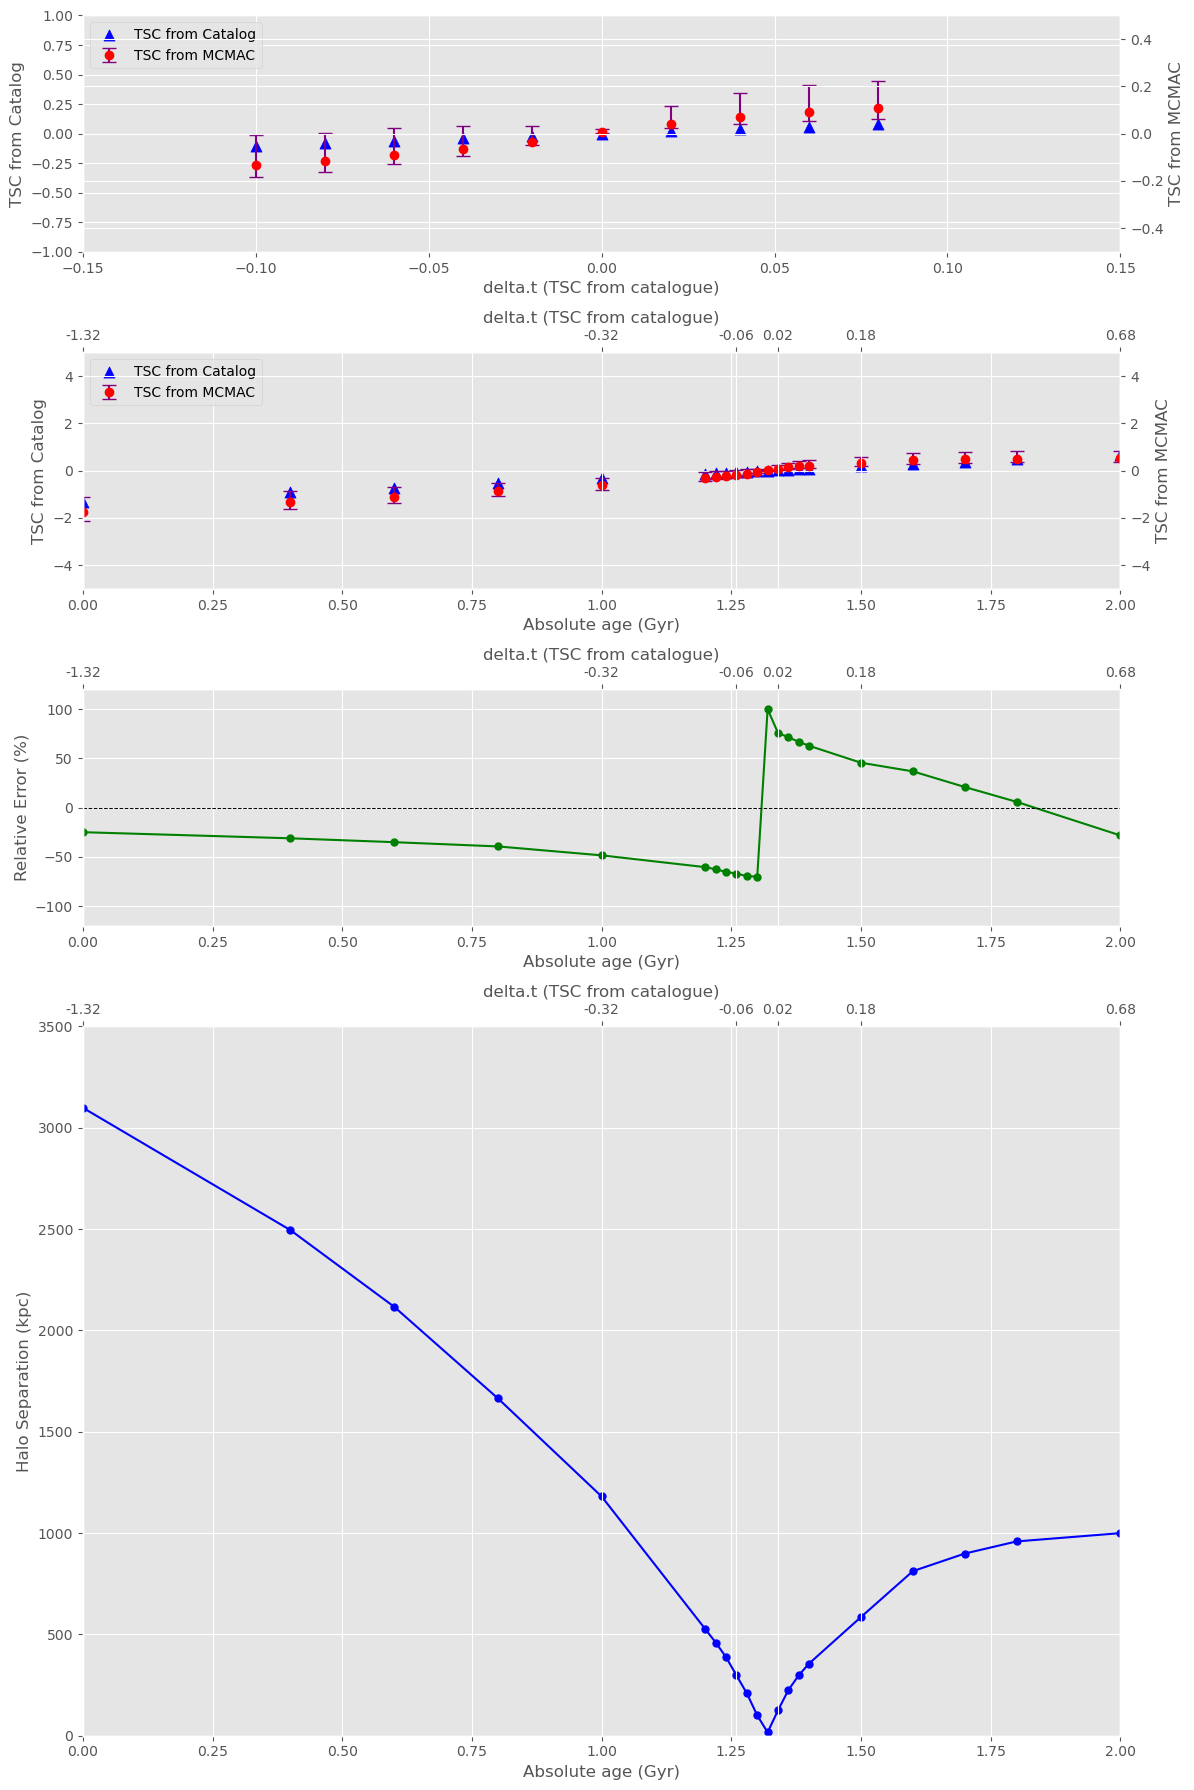

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected['Relative Error'] = ((df_selected['TSC0'] - df_selected['TSC_Catalog']) / abs(df_selected['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])


# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


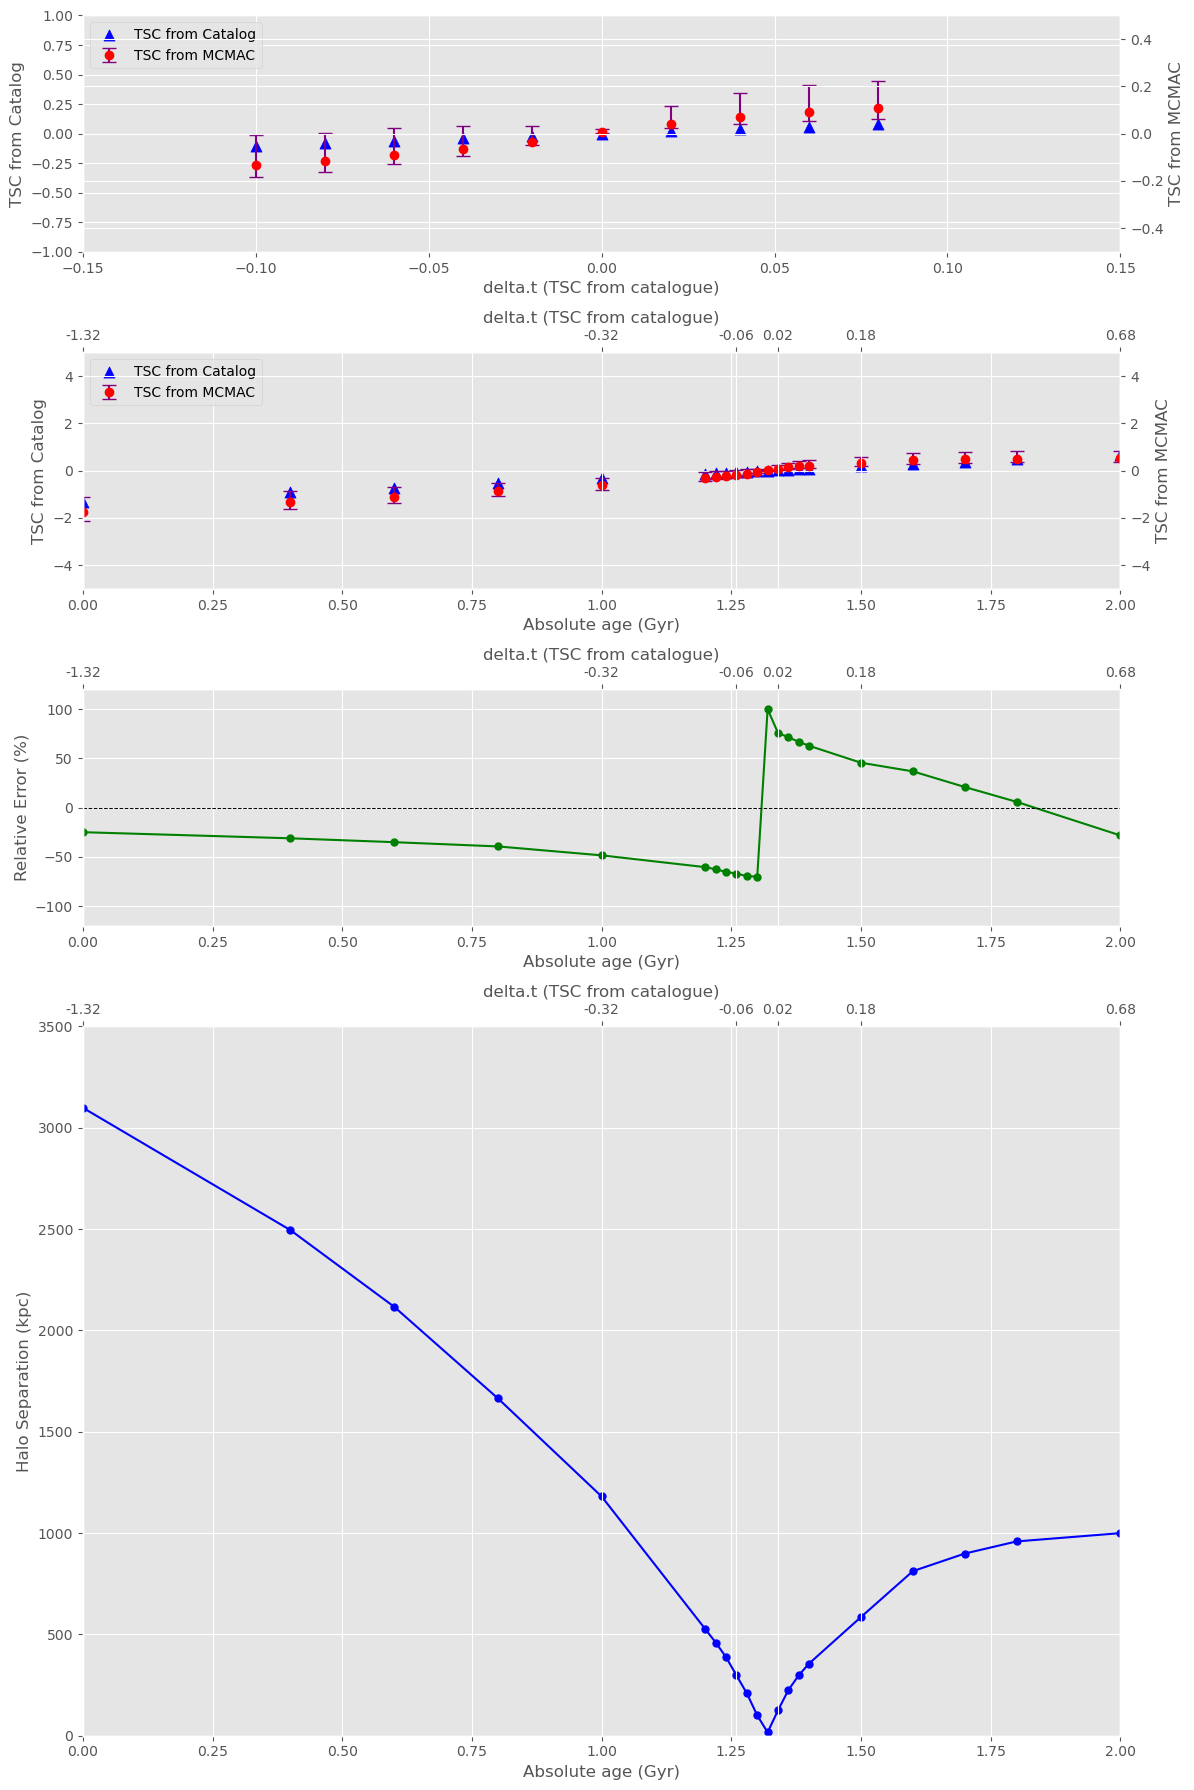

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])


# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:1 b=500kpc

In [10]:
import pandas as pd

filename = '../output_20degree/zh_1to1_b0.5_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,3102.464652,pre,-1.32,-1.759567,-1.380496,-2.388191
1,0.4,2479.069187,pre,-0.92,-1.325174,-1.039714,-1.810575
2,0.6,2159.484900,pre,-0.72,-1.129150,-0.860035,-1.547586
3,0.8,1711.813002,pre,-0.52,-0.880296,-0.658206,-1.237238
4,1.0,1177.594331,pre,-0.32,-0.617849,-0.434376,-0.929127


/tmp/ipykernel_3925171/4255551813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


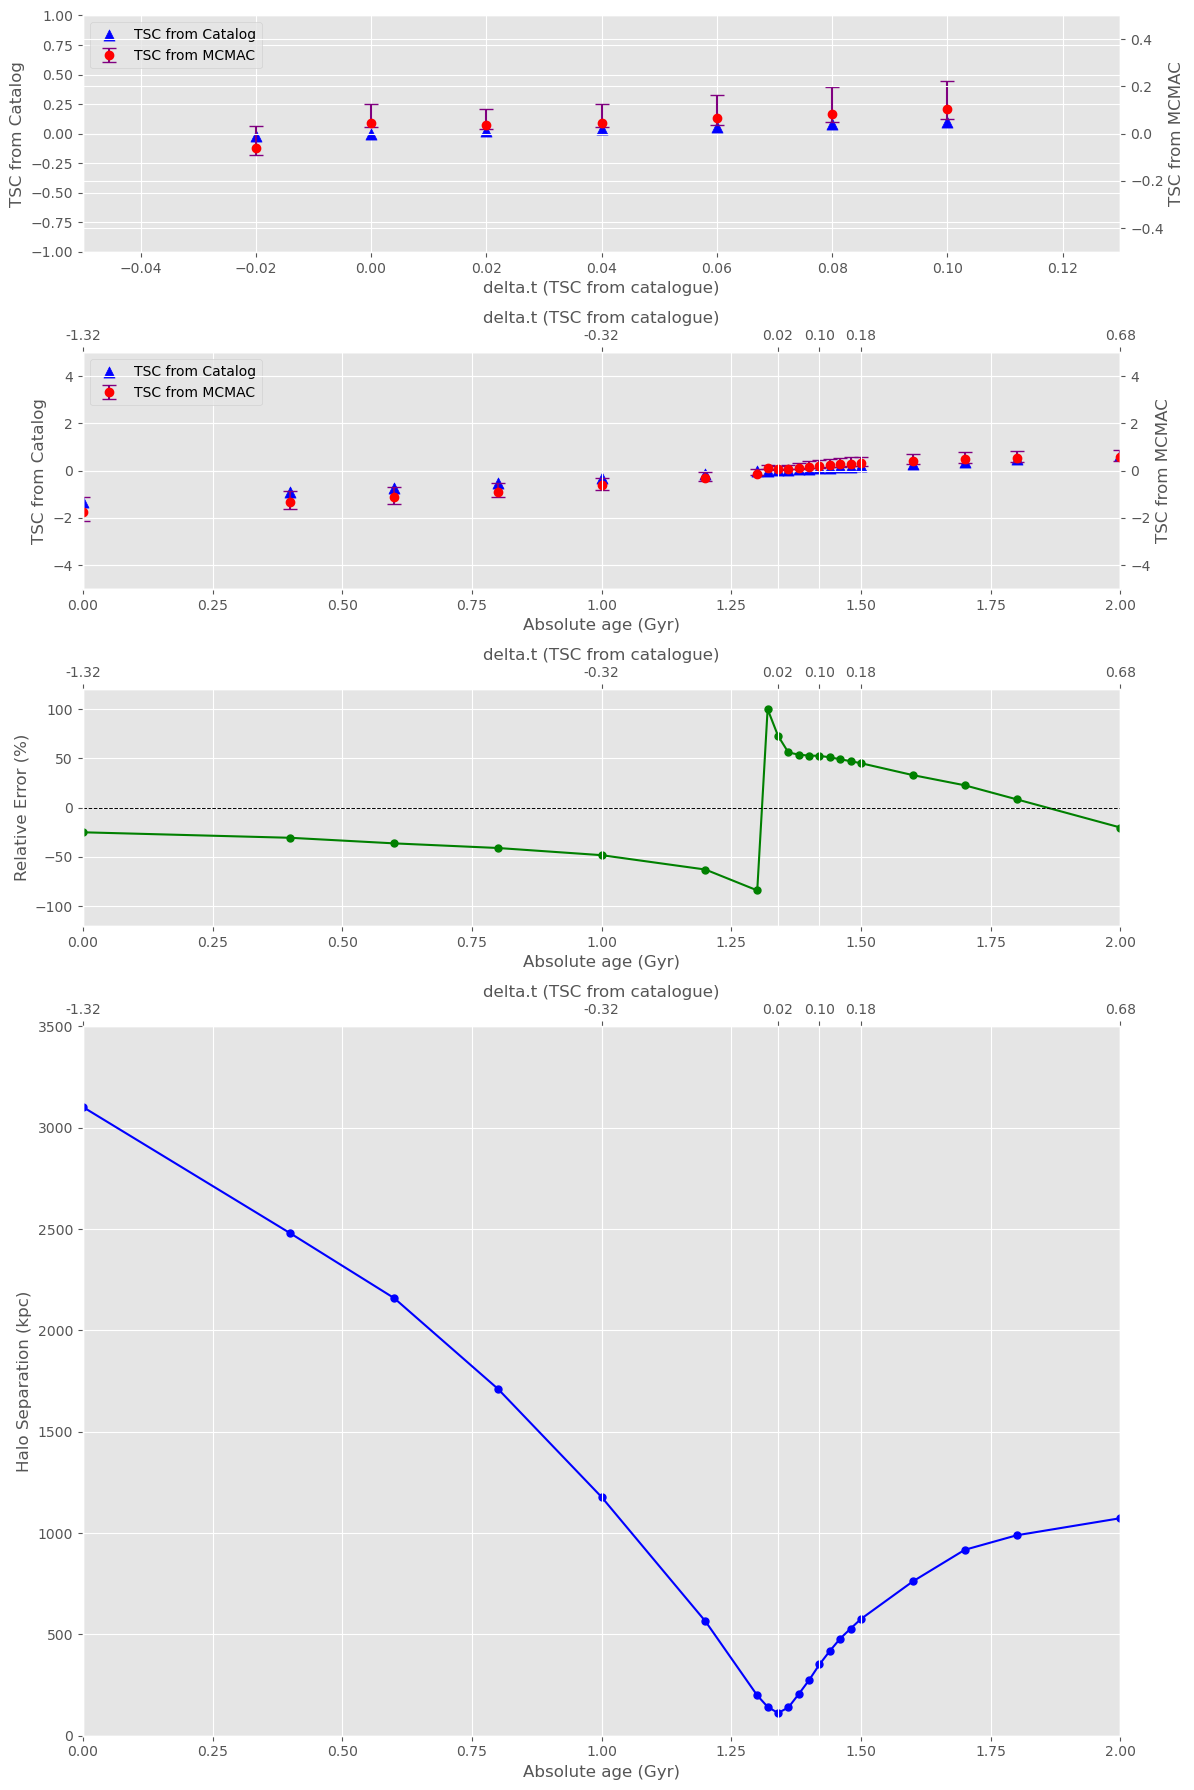

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.05, 0.13)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:1 b=1000kpc

In [12]:
import pandas as pd

filename = '../output_20degree/zh_1to1_b1_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,3100.661059,pre,-1.4,-1.760340,-1.380834,-2.388422
1,0.4,2531.730595,pre,-1.0,-1.356420,-1.064977,-1.858039
2,0.6,2146.665736,pre,-0.8,-1.122086,-0.854146,-1.547021
3,0.8,1767.195937,pre,-0.6,-0.907943,-0.677671,-1.275795
4,1.0,1305.748597,pre,-0.4,-0.678792,-0.486827,-0.999497


/tmp/ipykernel_3925171/148533628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


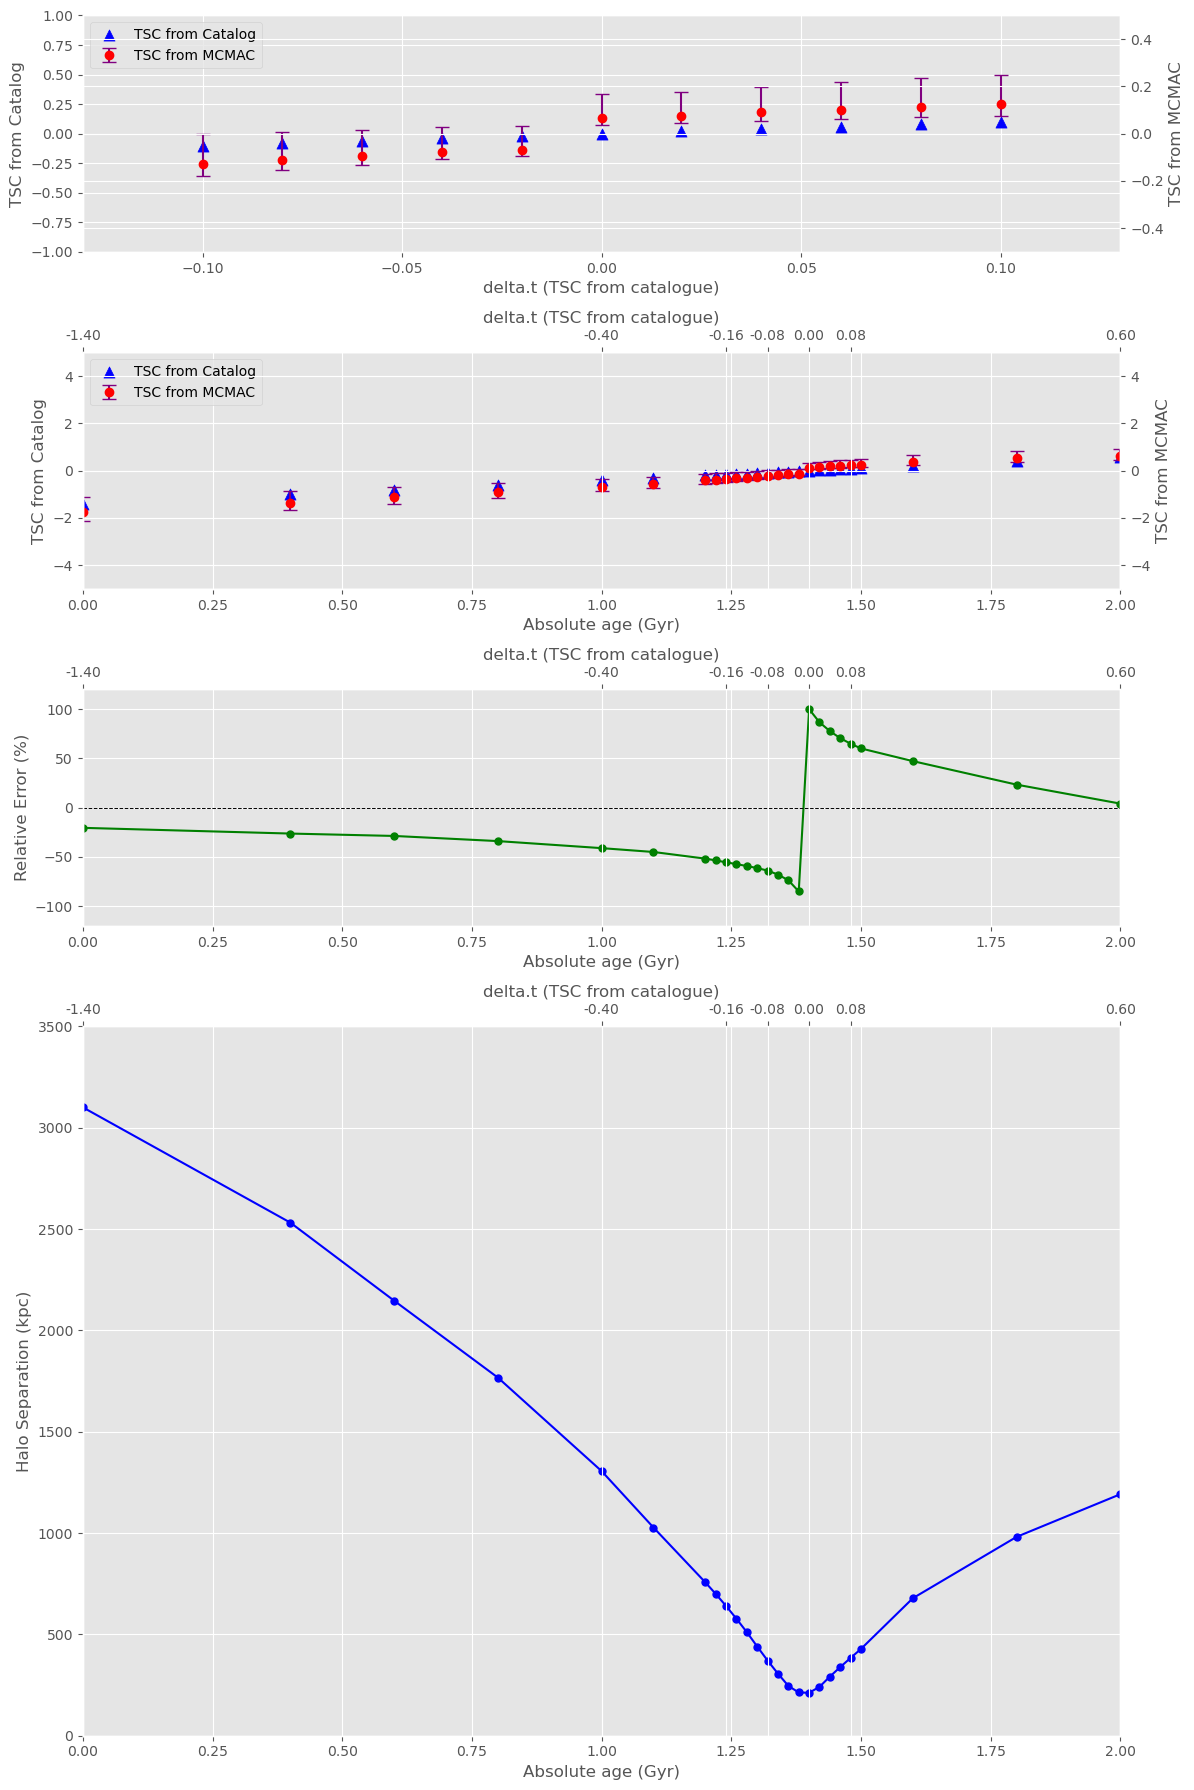

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])
# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.13, 0.13)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:3 b=0kpc

In [14]:
import pandas as pd

filename = '../output_20degree/zh_1to3_b0_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2631.245802,pre,-1.2,-1.675250,-1.314200,-2.283472
1,0.4,1977.086050,pre,-0.8,-1.178350,-0.914294,-1.615677
2,0.6,1679.687041,pre,-0.6,-0.975101,-0.751638,-1.370166
3,0.8,1200.403758,pre,-0.4,-0.692809,-0.502265,-1.012684
4,1.0,707.807165,pre,-0.2,-0.429279,-0.289272,-0.702019


/tmp/ipykernel_3925171/3912908101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


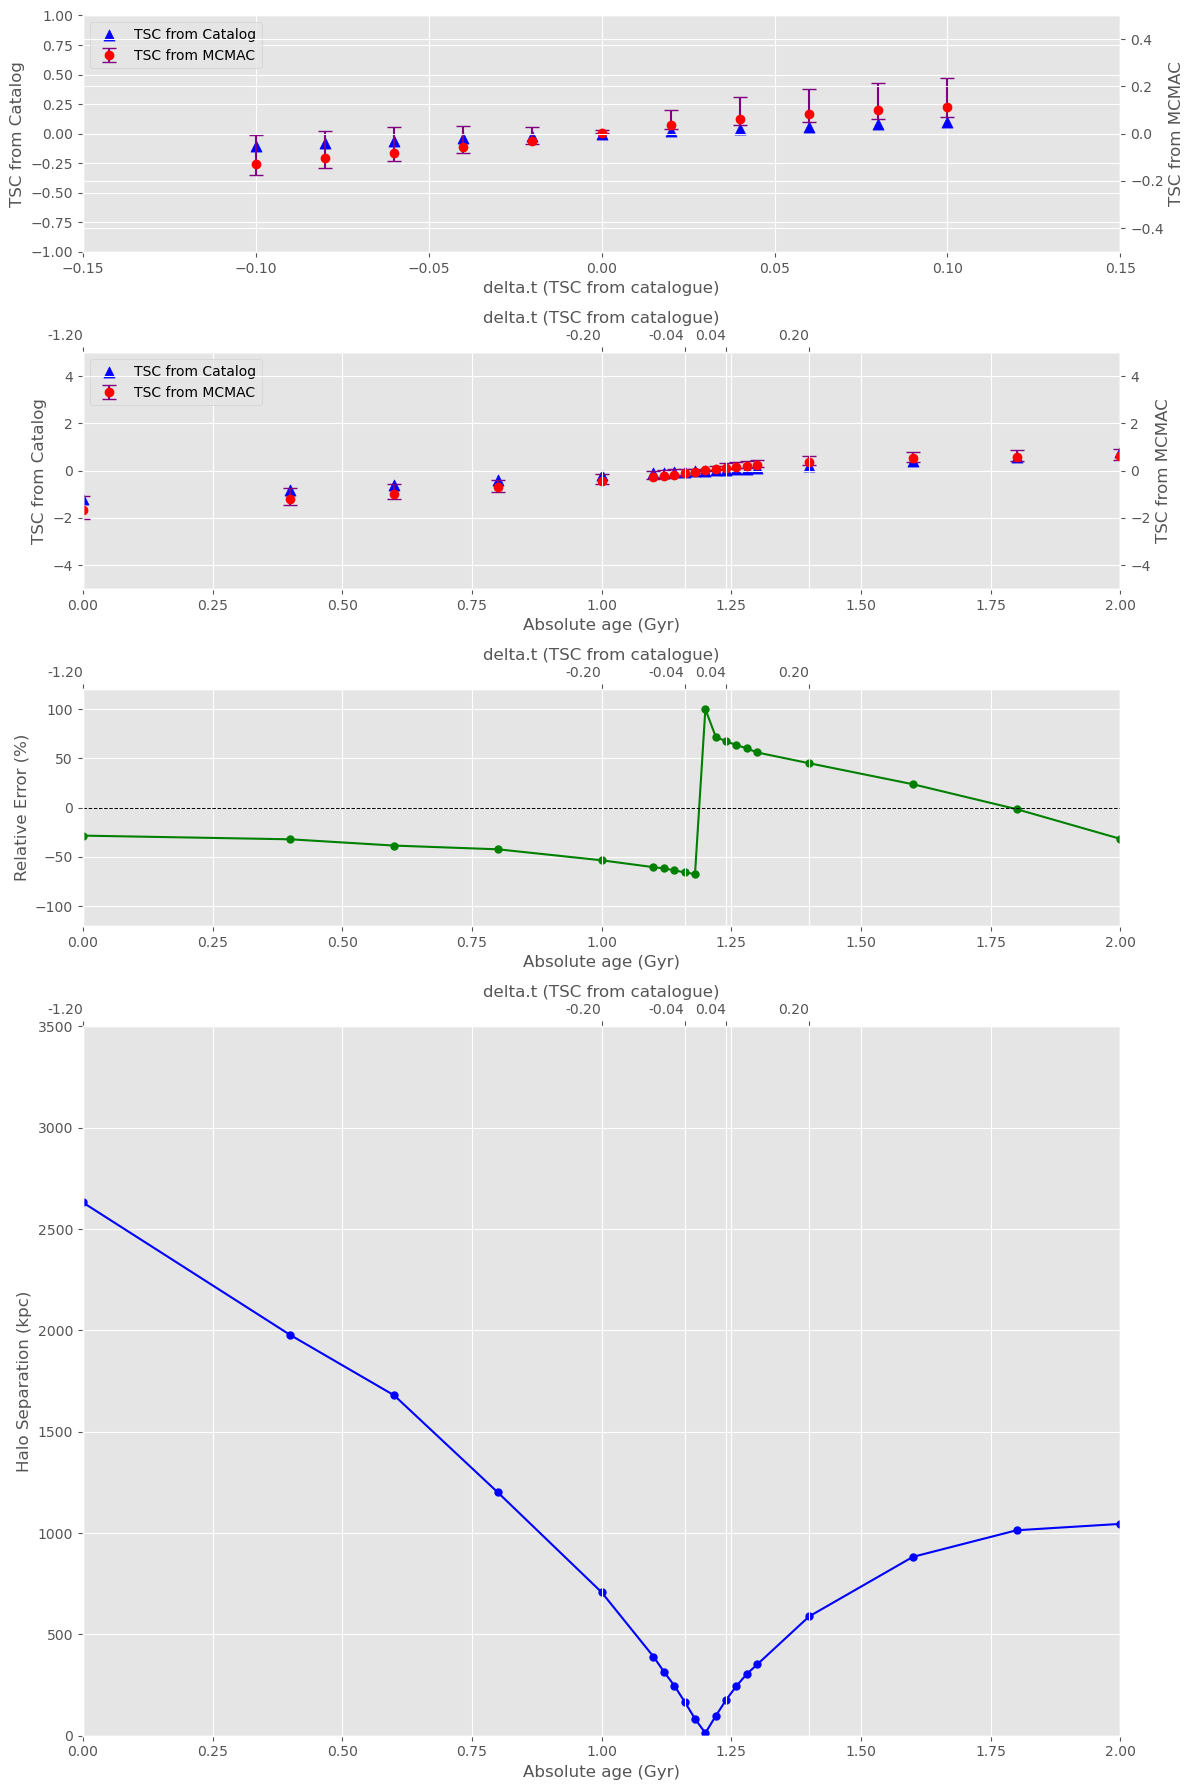

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')


# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])


# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')


# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='right')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:3 b=500kpc

In [16]:
import pandas as pd

filename = '../output_20degree/zh_1to3_b0.5_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2628.682260,pre,-1.2,-1.668055,-1.311628,-2.280518
1,0.4,1981.435862,pre,-0.8,-1.181572,-0.914265,-1.629356
2,0.6,1652.504065,pre,-0.6,-0.959325,-0.738017,-1.340468
3,0.8,1275.877380,pre,-0.4,-0.736900,-0.538478,-1.063745
4,1.0,743.673055,pre,-0.2,-0.449348,-0.303744,-0.721761


/tmp/ipykernel_3925171/3921188209.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


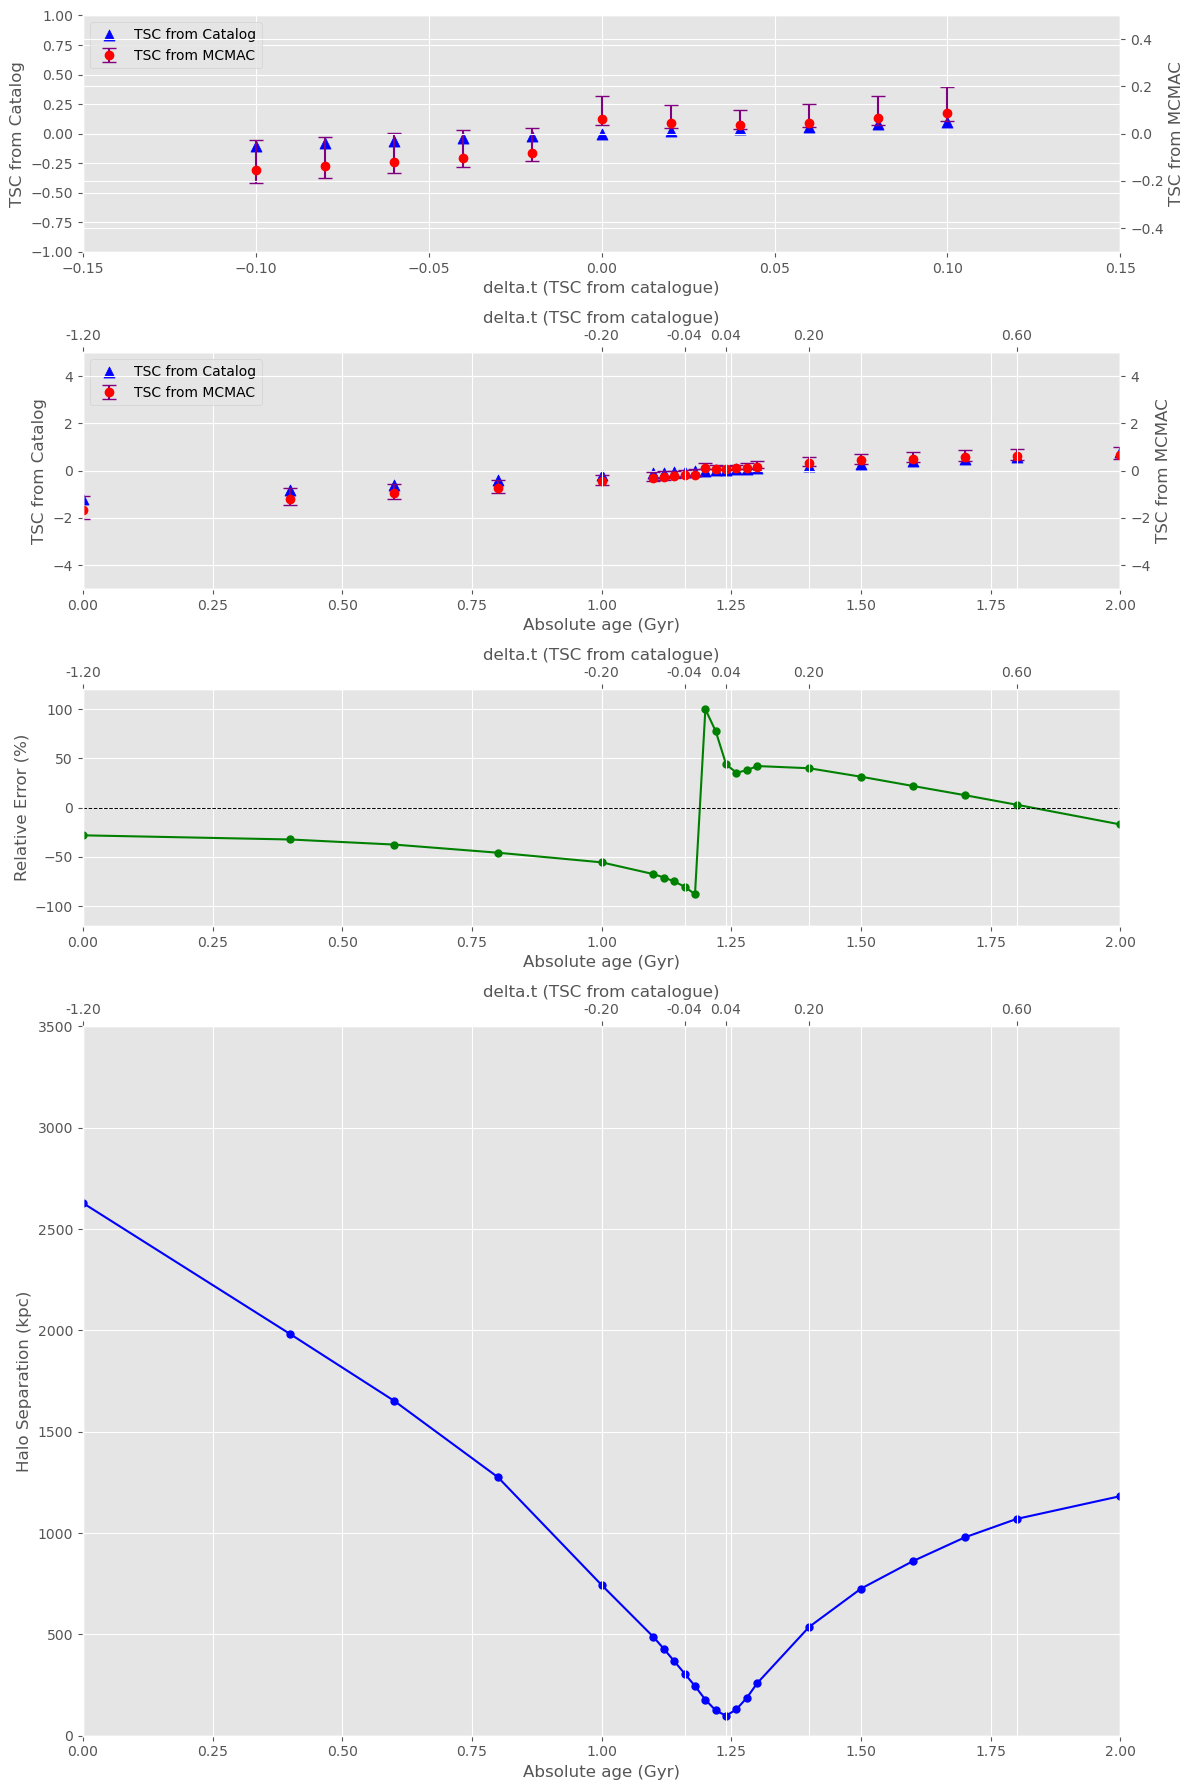

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')


# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])


# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:3 b=1000kpc

In [18]:
import pandas as pd

filename = '../output_20degree/zh_1to3_b1_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2624.568250,pre,-1.32,-1.663397,-1.309467,-2.277418
1,0.4,1992.103673,pre,-0.92,-1.187305,-0.922053,-1.631059
2,0.6,1758.527230,pre,-0.72,-1.025816,-0.796134,-1.432380
3,0.8,1351.747408,pre,-0.52,-0.780424,-0.575841,-1.108615
4,1.0,881.778732,pre,-0.32,-0.525194,-0.363748,-0.804167


/tmp/ipykernel_3925171/873269438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


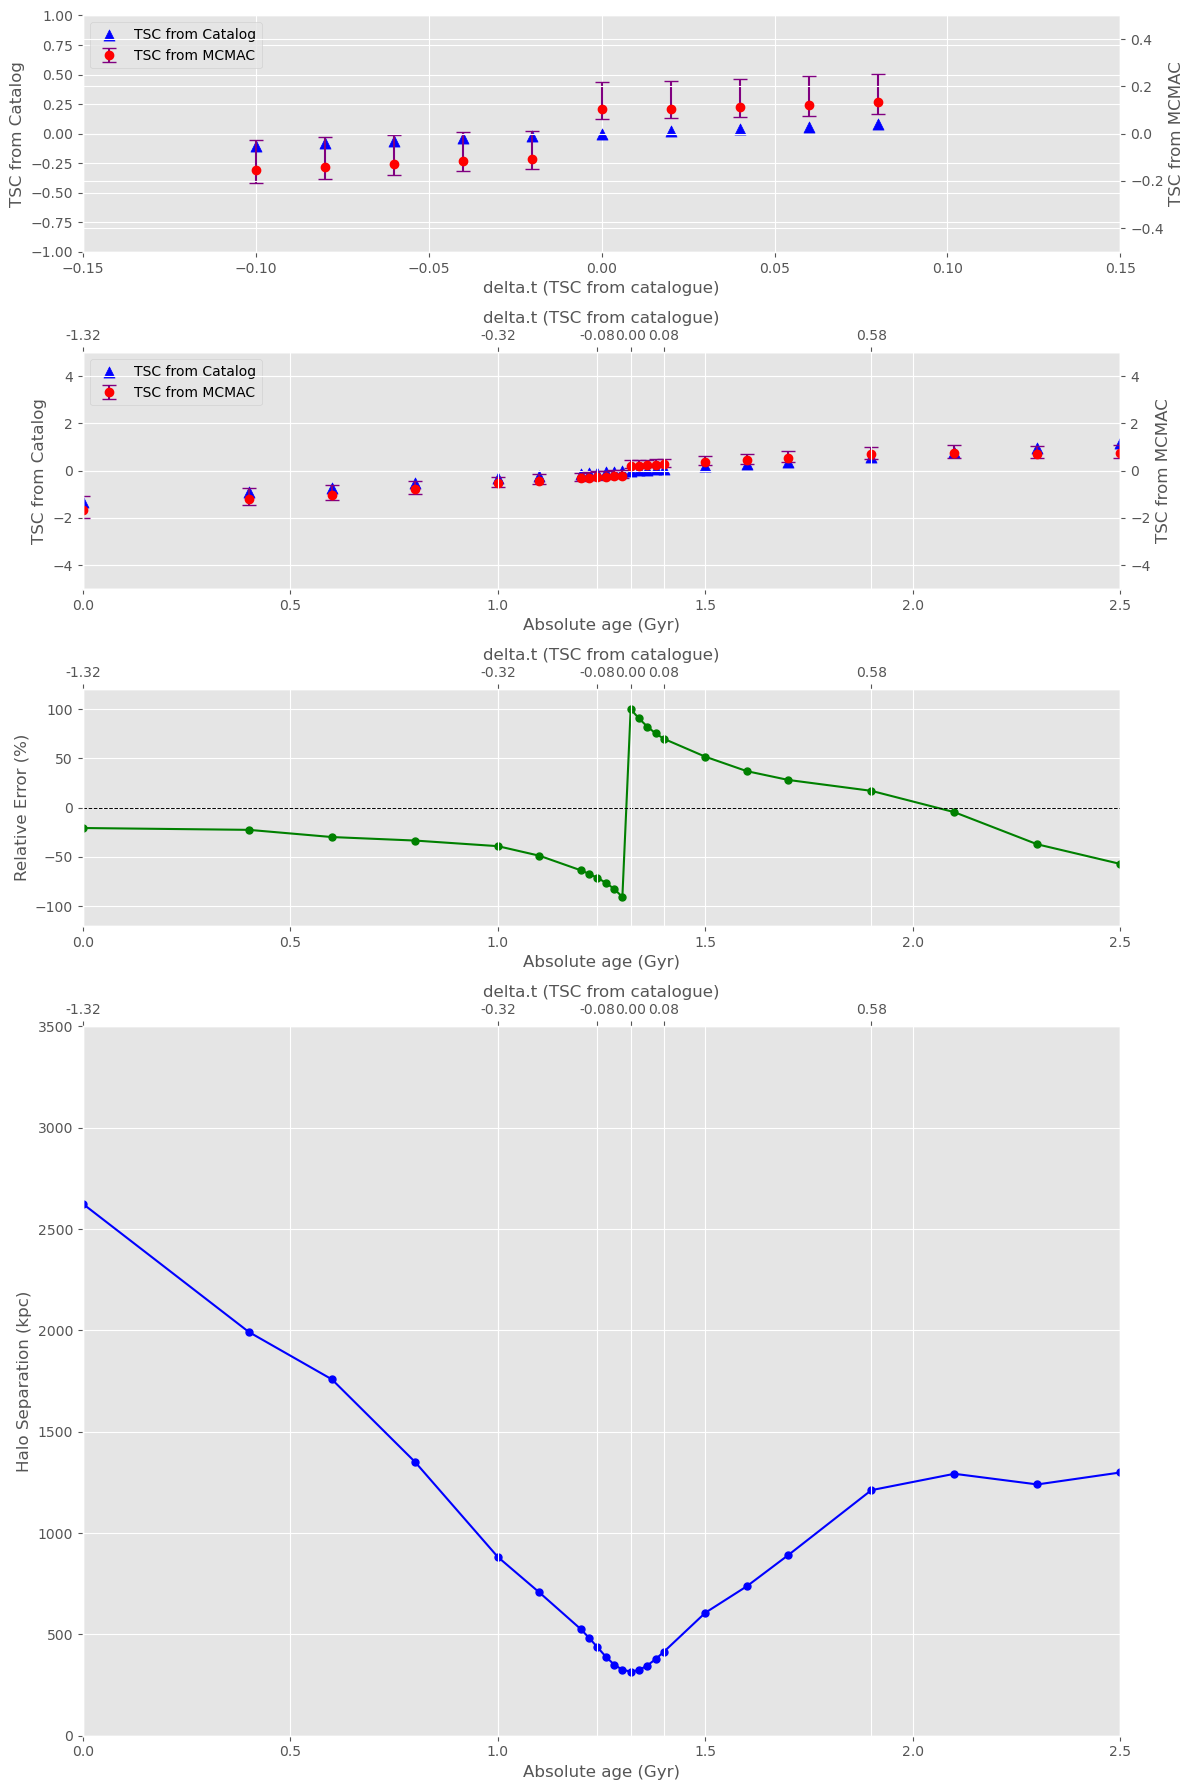

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')


# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])


# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2.5)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2.5)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2.5)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:10 b=0kpc

In [20]:
import pandas as pd

filename = '../output_20degree/zh_1to10_b0_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2271.333829,pre,-1.04,-1.481086,-1.164466,-2.026925
1,0.4,1831.557505,pre,-0.64,-1.141508,-0.882884,-1.571606
2,0.6,1414.548949,pre,-0.44,-0.851005,-0.650895,-1.194631
3,0.8,835.495384,pre,-0.24,-0.498756,-0.353008,-0.757028
4,1.0,137.315846,pre,-0.04,-0.097627,-0.058099,-0.248655


/tmp/ipykernel_3925171/401151948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


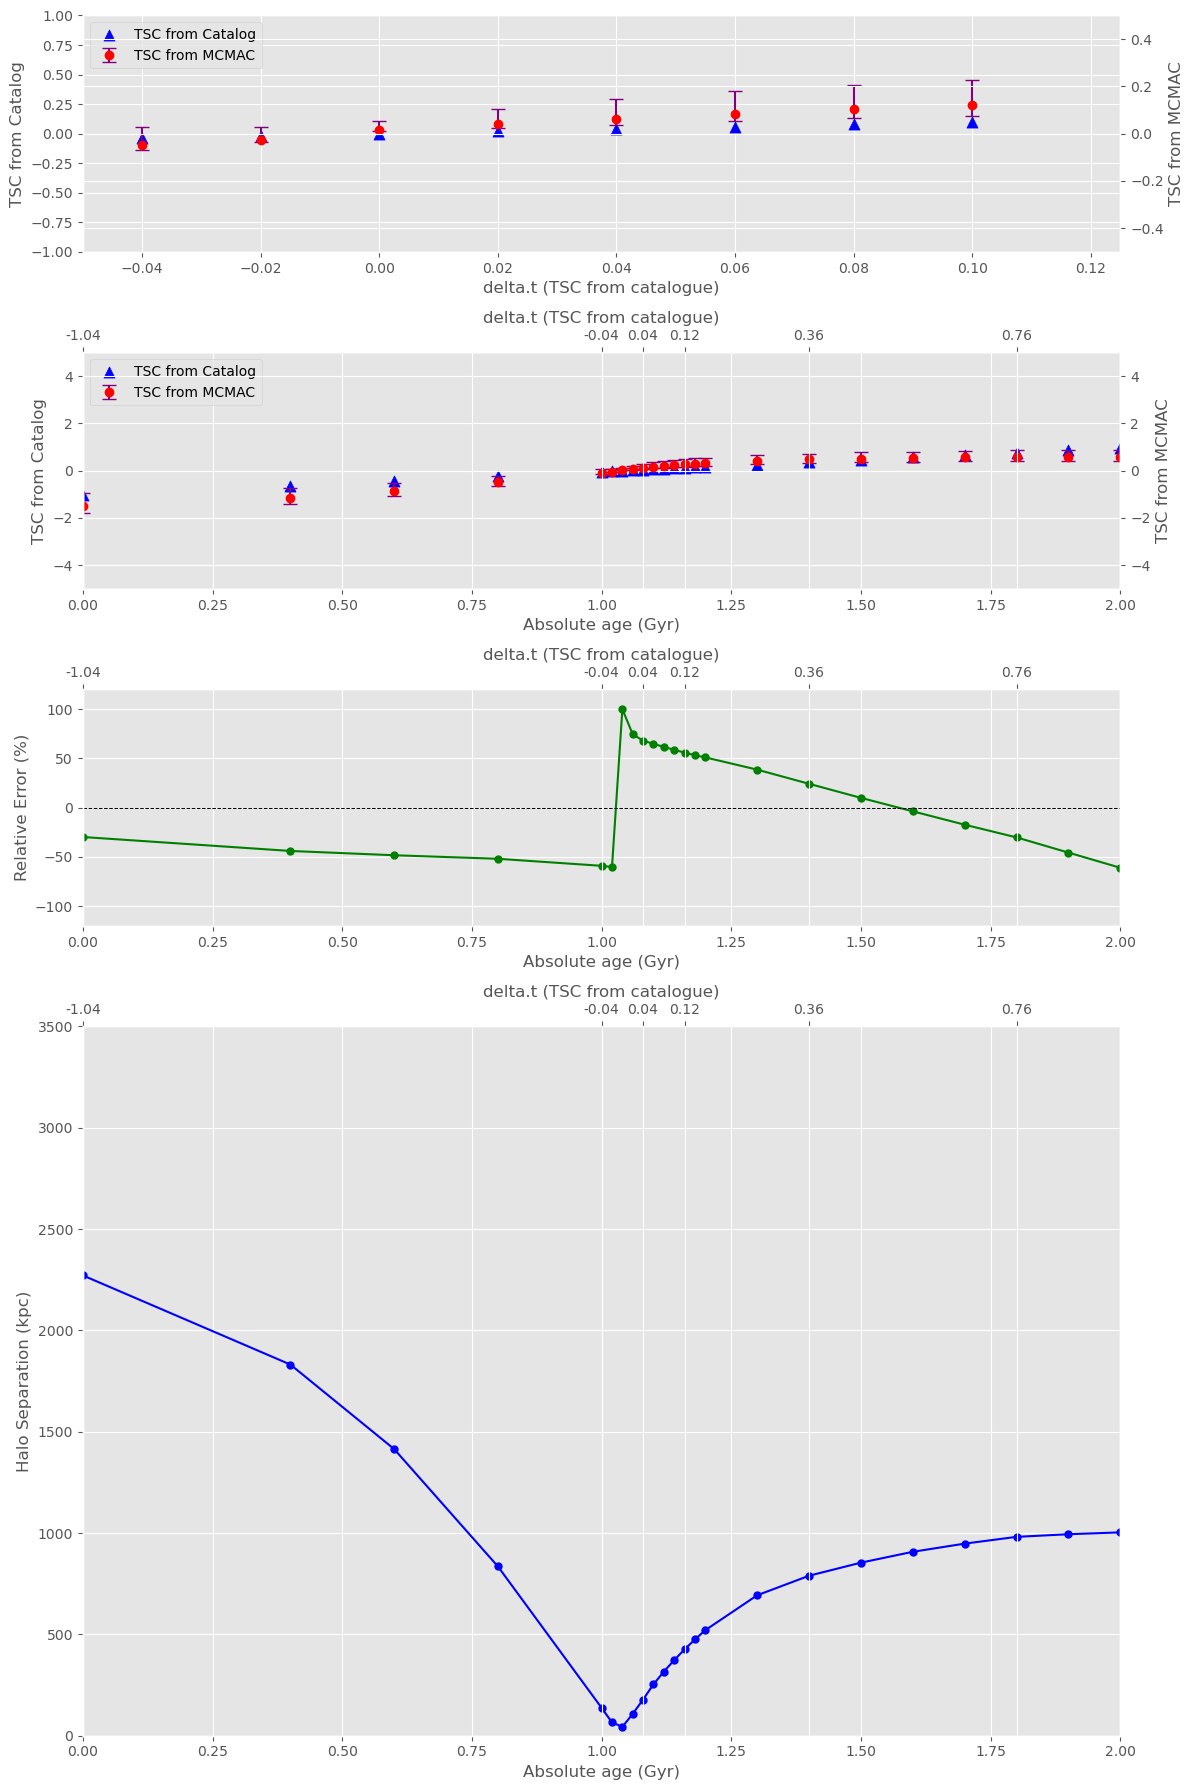

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')


# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])


# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.05, 0.125)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:10 b=500kpc

In [22]:
import pandas as pd

filename = '../output_20degree/zh_1to10_b0.5_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2273.186616,pre,-1.04,-1.481496,-1.167313,-2.020006
1,0.4,1745.740873,pre,-0.64,-1.083666,-0.836613,-1.499028
2,0.6,1255.654308,pre,-0.44,-0.751604,-0.565570,-1.067723
3,0.8,818.283871,pre,-0.24,-0.490320,-0.344890,-0.748118
4,1.0,389.992165,pre,-0.04,-0.252877,-0.161881,-0.463127


/tmp/ipykernel_3925171/401151948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


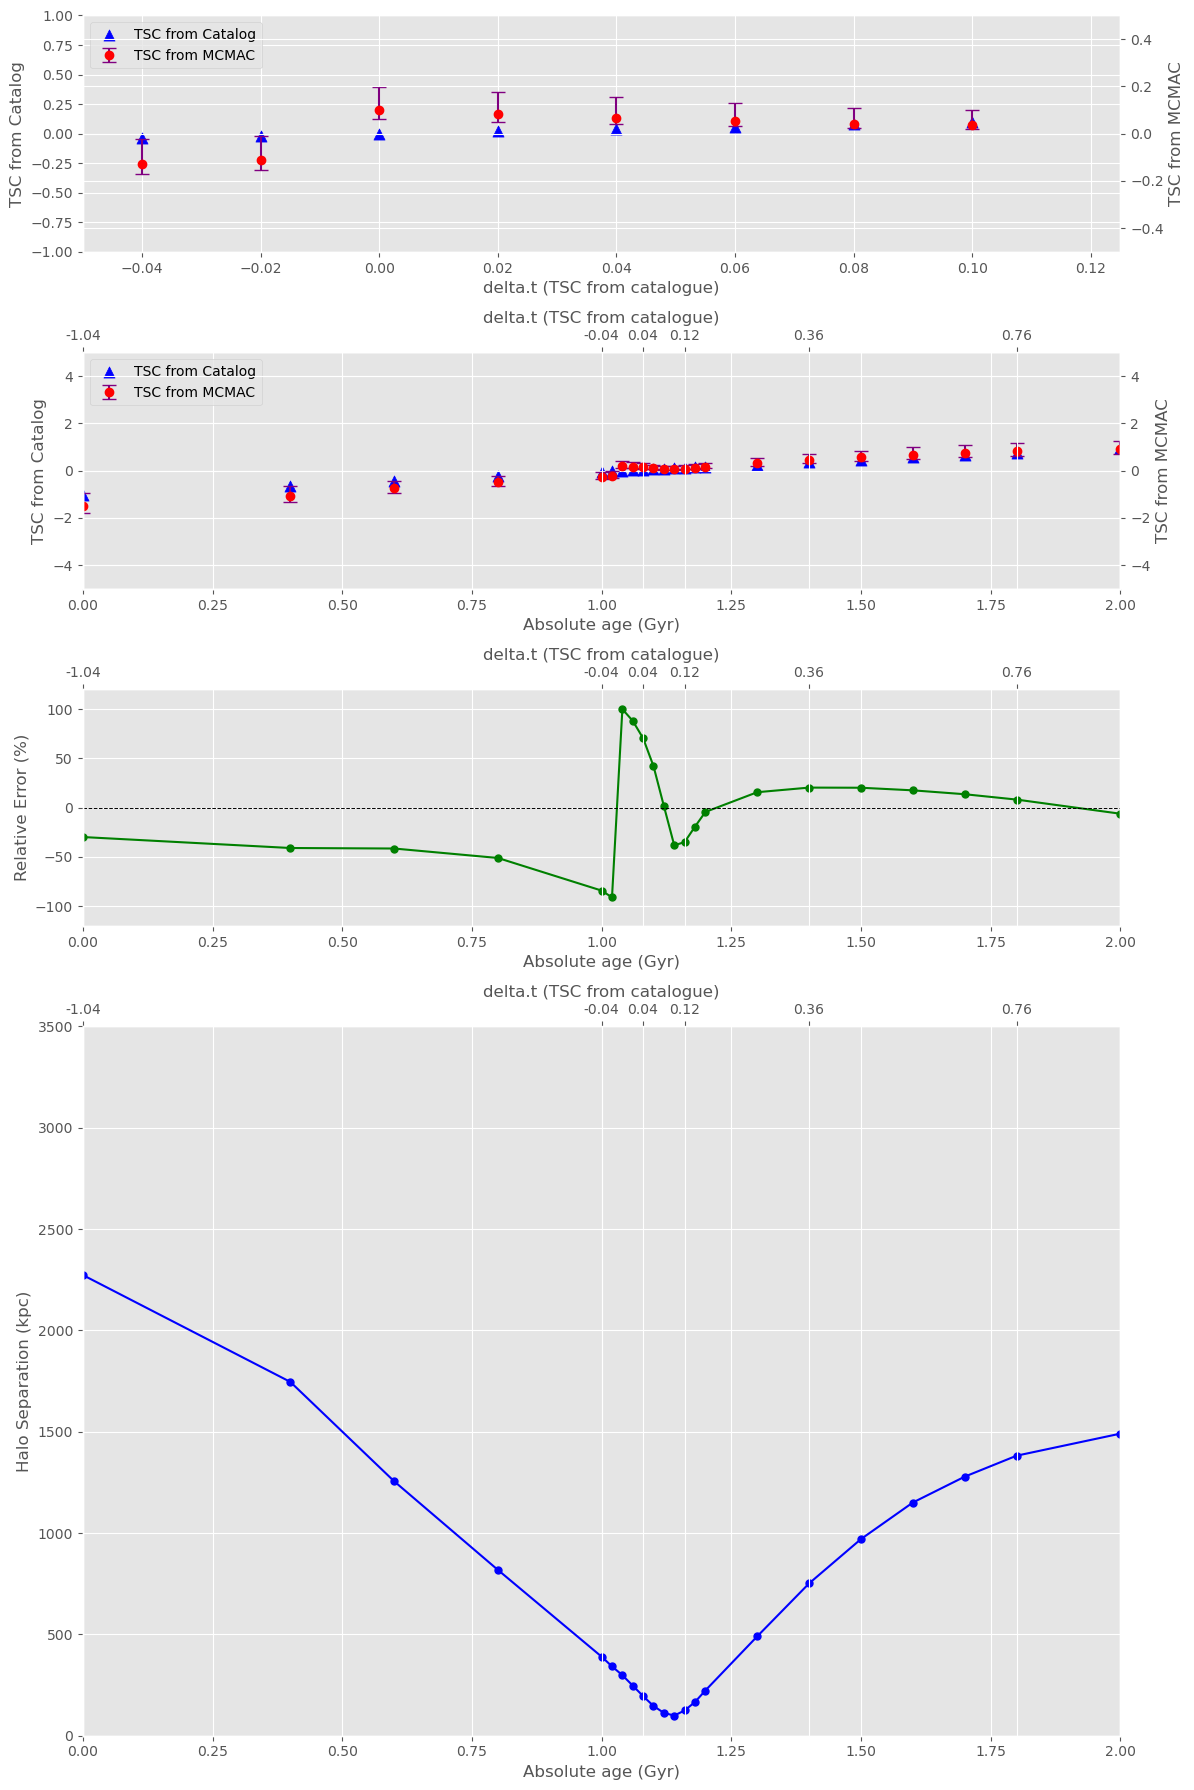

In [23]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')


# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])


# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.05, 0.125)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:10 b=1000kpc

In [24]:
import pandas as pd

filename = '../output_20degree/zh_1to10_b1_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2265.884062,pre,-1.24,-1.475509,-1.161238,-2.027006
1,0.4,1797.732011,pre,-0.84,-1.114582,-0.860465,-1.539037
2,0.6,1335.696274,pre,-0.64,-0.798546,-0.606280,-1.127373
3,0.8,935.539414,pre,-0.44,-0.557934,-0.398552,-0.832234
4,1.0,634.535557,pre,-0.24,-0.391581,-0.266359,-0.625454


/tmp/ipykernel_3925171/770547233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


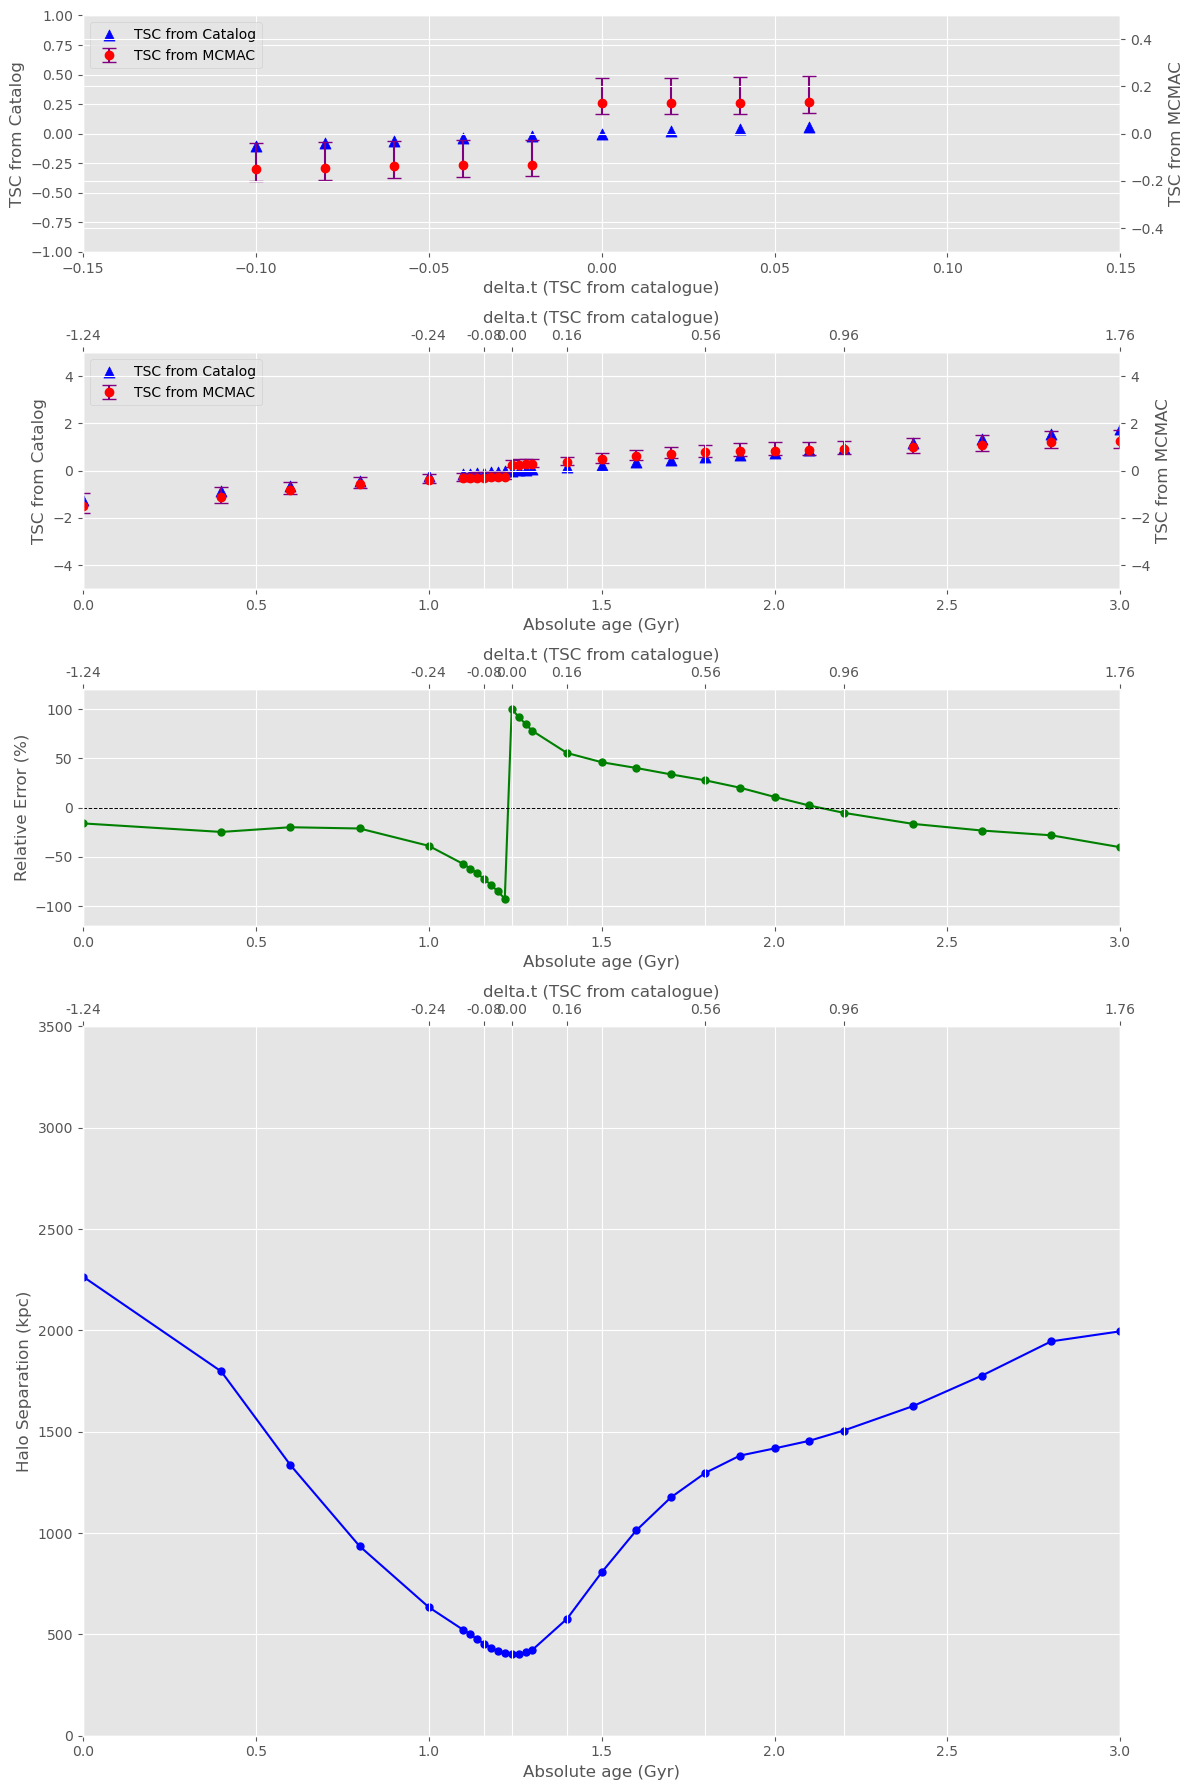

In [25]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')


# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])


# delta.t の範囲でフィルタリング
df_zoomed = df_selected[(df_selected['TSC_Catalog'] >= -0.1) & (df_selected['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)
ax_zoom.set_ylim(-1, 1)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(0, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::4])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()
